## ライブラリ読み込み

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10

## 小さなCNNでテスト

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [0]:
model = Sequential()

model.add(Convolution2D(20, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(80, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(11))
model.add(Activation('softmax'))

In [210]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 20)        80        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 40)        7240      
_________________________________________________________________
activation_30 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 40)        160       
__________

In [237]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=1000, epochs=5)

Train on 100000 samples, validate on 10000 samples
Epoch 1/5
100000/100000 [==============================] - 10s 95us/step - loss: 0.3434 - acc: 0.8574 - val_loss: 0.3564 - val_acc: 0.8490
Epoch 2/5
100000/100000 [==============================] - 10s 96us/step - loss: 0.3221 - acc: 0.8671 - val_loss: 0.3370 - val_acc: 0.8592
Epoch 3/5
100000/100000 [==============================] - 10s 96us/step - loss: 0.3071 - acc: 0.8720 - val_loss: 0.4203 - val_acc: 0.8199
Epoch 4/5
100000/100000 [==============================] - 10s 95us/step - loss: 0.2988 - acc: 0.8756 - val_loss: 0.3406 - val_acc: 0.8593
Epoch 5/5
100000/100000 [==============================] - 9s 95us/step - loss: 0.2948 - acc: 0.8773 - val_loss: 0.3197 - val_acc: 0.8690


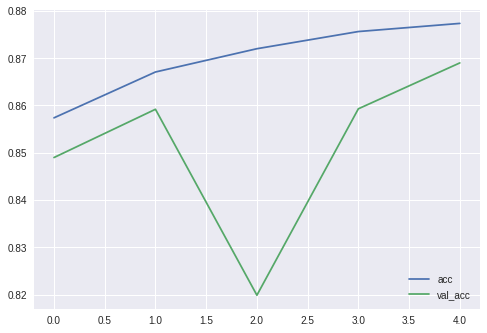

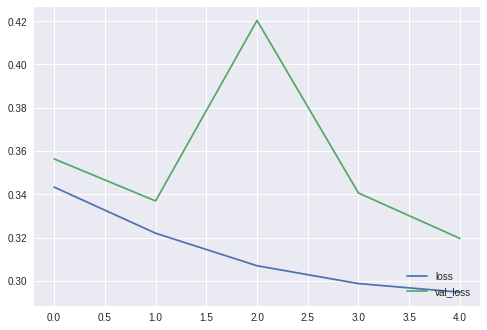

In [238]:
plot_history(history)

In [0]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

In [0]:
def test_object_count():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (32, 32, 3)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test)
    print(np.argmax(preds, axis=1))

[6 2 1 2 6 9 2 7 3 1]
[6 2 1 2 6 8 2 7 3 1]


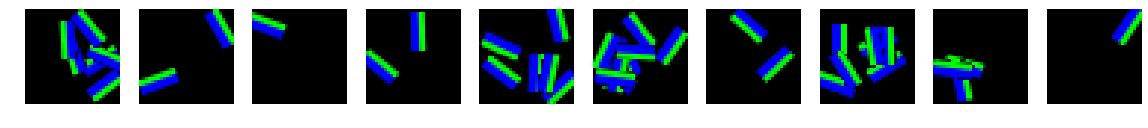

In [242]:
test_object_count()

## 重みデータのsave/load

In [0]:
model.save_weights("model_weights.h5")

In [0]:
model.load_weights("model_weights.h5")

## OpenCVで画像の生成

In [0]:
import cv2

CV2オブジェクトは  
(width, height, 3)の3次元配列で型はuint8

cifar10などのオブジェクトは  
(num, width, height, 3)の4次元配列で型はfloat32

In [0]:
img = np.zeros((32,32,3), dtype = 'uint8')

In [0]:
def show_image():
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
def draw_obj(img, x, y):
  s = 3
  img = cv2.rectangle(img, (x-s,y-s), (x+s,y+s), (0,255,0), -1)
  img = cv2.rectangle(img, (x-s,y-s), (x+s,y+s), (0,0,255), 1)

In [0]:
draw_obj(img, 1,1)

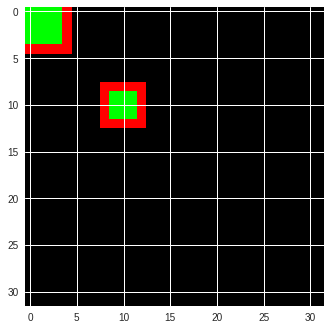

In [51]:
show_image()

In [0]:
def draw_num_obj_rand(img, num):
  for i in range(num):
    x = np.random.randint(32)
    y = np.random.randint(32)
    draw_obj(img, x, y)

In [0]:
def make_train(X_train, Y_train, X_test, Y_test):
  for i in range(100000):
    img = X_train[i]
    num = get_rand(10)
    draw_num_obj_rand(img, num)
    Y_train[i][num] = 1.0

  for i in range(10000):
    img = X_test[i]
    num = get_rand(10)
    draw_num_obj_rand(img, num)
    Y_test[i][num] = 1.0


In [0]:
X_train = np.zeros((100000, 32, 32, 3), dtype = 'uint8')
Y_train = np.zeros((100000, 11), dtype = 'float32')
X_test  = np.zeros((10000, 32, 32, 3), dtype = 'uint8')
Y_test  = np.zeros((10000, 11), dtype = 'float32')

In [0]:
make_train(X_train, Y_train, X_test, Y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

## 画像回転

In [0]:
img = np.zeros((32,32,3), dtype = 'uint8')

In [0]:
def draw_obj(img, x, y):
  w = 2
  h = 6
  img = cv2.rectangle(img, (x-w,y-h), (x+w,y+h), (0,255,0), -1)
  img = cv2.rectangle(img, (x,y-h), (x+w,y+h), (0,0,255), -1)

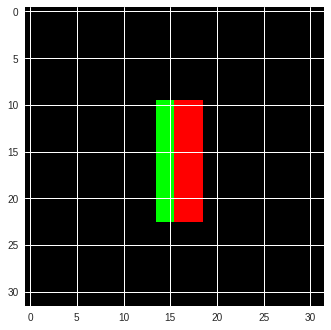

In [180]:
draw_obj(img, 16, 16)
show_image()

In [0]:
def affine_image(img, x, y, angle, scale=1.0):
  w = 32
  h = 32

  center = (w/2, h/2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

  # 平行移動して(x, y)の位置に置く
  affine_matrix = rotation_matrix.copy()
  affine_matrix[0][2] = affine_matrix[0][2] - w/2 + x
  affine_matrix[1][2] = affine_matrix[1][2] - h/2 + y

  img_rot = cv2.warpAffine(img, affine_matrix, (w, h), flags=cv2.INTER_CUBIC)

  return img_rot

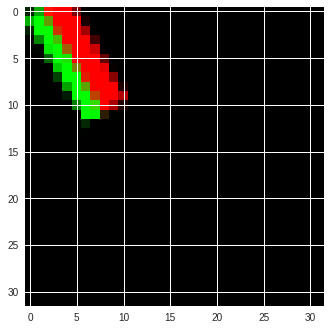

In [181]:
img = affine_image(img, 5, 5, 30)
show_image()

## 画像重ね合わせペースト

In [0]:
def put_image(img1, img2):
  # I want to put logo on top-left corner, So I create a ROI
  rows,cols,channels = img2.shape
  roi = img1[0:rows, 0:cols ]

  # Now create a mask of logo and create its inverse mask also
  img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  # Now black-out the area of logo in ROI
  img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

  # Take only region of logo from logo image.
  img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

  # Put logo in ROI and modify the main image
  dst = cv2.add(img1_bg,img2_fg)
  img1[0:rows, 0:cols ] = dst

  return img1


In [0]:
obj_img = np.zeros((32,32,3), dtype = 'uint8')
draw_obj(obj_img, 16, 16)
obj_img = affine_image(obj_img, 10, 15, 120)
img = put_image(img, obj_img)

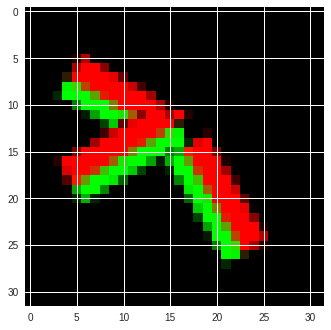

In [188]:
show_image()

## 回転画像データセット生成

In [0]:
def draw_rotated_obj(img, x, y, angle):
  w = 32
  h = 32

  obj_img = np.zeros((w,h,3), dtype = 'uint8')
  draw_obj(obj_img, w//2, h//2)
  obj_img = affine_image(obj_img, x, y, angle)
  img = put_image(img, obj_img)
  return img

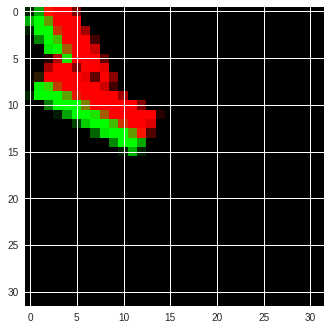

In [196]:
img = np.zeros((32,32,3), dtype = 'uint8')
img = draw_rotated_obj(img, 5, 5, 30)
img = draw_rotated_obj(img, 7, 10, 60)
show_image()

In [0]:
def draw_num_obj_rand(img, num):
  for i in range(num):
    x = np.random.randint(24) + 4
    y = np.random.randint(24) + 4
    angle = np.random.randint(360)
    img = draw_rotated_obj(img, x, y, angle)